# Regression using deep Gaussian processes

Import Tensorflow 2 and GPflow 2

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
from gpflow.kernels import White, RBF
from gpflow.likelihoods import Gaussian
from gpflow import set_trainable

import time
np.random.seed(0)
tf.random.set_seed(0)


ImportError: cannot import name 'set_trainable'

The "models" folder from "dgp_dace" contains the different DGP based models.
"dgp" is the standard dgp regression model. 

In [2]:
from dgp_dace.models.dgp import DGP

### Definition of the step function

In [3]:
f_step = lambda x: 0. if x < 0.5 else 1.

In [4]:
Ns = 300
Xs = np.linspace(-0.5, 1.5, Ns)[:, None]
Ys = np.reshape([f_step(x) for x in Xs], Xs.shape)

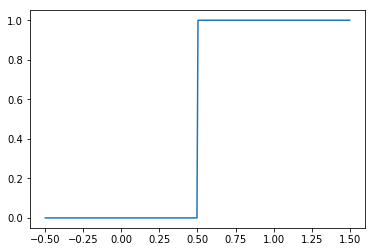

In [5]:
plt.figure()
plt.plot(Xs,Ys)

### Generation of training data.

In [6]:

N, M = 50, 25 ## N corresponds to the size of training data and M to the size of the inducing inputs
X_train = np.random.uniform(0, 1, N)[:, None] ## Input data
Z = np.random.uniform(0, 1, M)[:, None] ## Inducing inputs
Y_train = np.reshape([f_step(x) for x in X_train], X_train.shape) + np.random.randn(
    *X_train.shape) * 1e-2 ## Observed values (a random noise is added to the step function)

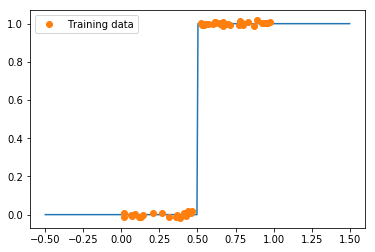

In [7]:
plt.figure()
plt.plot(Xs,Ys)
plt.plot(X_train,Y_train,'o',label='Training data')
plt.legend()

### Creation of the DGP model

In [8]:
DGP?

To defined a DGP model we have to define the architecture of the model. 
For that, the argument 'num_units' is used.
'num_units' is given as a list where each element correspond to the number of units at a layer, except the first layer. In fact, the first layer number of units correspond to the dimension of the input data. Therefore, the length of 'num_units'corresponds to the number of hidden layers of the DGP model.

In [9]:
num_units = [1,1] # Defines a DGP with two hidden layers of one unit each

Then, the kernel at each layer is defined. kernels is given as a list of kernel for each hidden layer plus the input layer.

In [10]:
kernels = [RBF(lengthscales=[1]*unit, variance=1.0)  for unit in [X_train.shape[1]]+num_units] ## An ARD kernel for each layer is defined


In [11]:
dgp_model = DGP(X_train, Y_train, Z, kernels, num_units = num_units, likelihood= Gaussian(), num_samples=10) 

The DGP architecture
layer 1 : dim_in 1 --> dim_out 1
layer 2 : dim_in 1 --> dim_out 1


### Training of the DGP model

In [12]:
dgp_model.optimize_adam?

Training using the Adam optimizer.

In [13]:
dgp_model.optimize_adam(iterations=5000, lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, messages=100)

ELBO: -85.98812279560475
ELBO: -183.5983617745695
ELBO: -978.7225656433673
ELBO: -89.55995452944481


KeyboardInterrupt: 

In [26]:
kernels = [RBF(lengthscales=[1]*unit, variance=1.0)  for unit in [X_train.shape[1]]+num_units] 
dgp_model = DGP(X_train, Y_train, Z, kernels, num_units = num_units, likelihood= Gaussian(), num_samples=10) 

The DGP architecture
layer 1 : dim_in 1 --> dim_out 1
layer 2 : dim_in 1 --> dim_out 1


Training using an optimization procedure with natural gradient and Adam optimizer

In [24]:
dgp_model.optimize_nat_adam?

In [27]:
dgp_model.optimize_nat_adam(iterations1=500, iterations2=5000,lr_adam =0.01,beta_1=0.8, beta_2=0.9,lr_gamma=0.01,ng_all = False, messages= 100)

ELBO: -85.98812279560475
ELBO: -300.248150011454
ELBO: -314.47537547888726
ELBO: -222.5885237198413
ELBO: -154.8163605751663
ELBO: -112.07732594517894
ELBO: -59.439392295184746
ELBO: -43.40419065034427
ELBO: -26.719518743337904
ELBO: 1.497104644882974
ELBO: 22.548572359027375
ELBO: 41.922525139993525
ELBO: 57.94133206040009
ELBO: 72.29123558602288
ELBO: 82.70965023151402
ELBO: 89.63491581312333
ELBO: 90.87998357366622
ELBO: 98.14268558387971
ELBO: 99.16489514193215
ELBO: 95.44033457124081
ELBO: 97.99265238872387
ELBO: 99.89099064002141
ELBO: 98.79977732522569
ELBO: 94.85195077753491
ELBO: 102.4368982202546
ELBO: 100.41081779749217
ELBO: 102.58608290497075
ELBO: 107.43076313965545
ELBO: 106.72999978599177
ELBO: 100.7223015924561
ELBO: 104.01353861937073
ELBO: 106.45196020707886
ELBO: 104.56159289470806
ELBO: 107.28812483574772
ELBO: 101.59649817869168
ELBO: 93.8851519154486
ELBO: 101.92123962206271
ELBO: 103.92931287098982
ELBO: 107.31733669950803
ELBO: 105.15115076579711
ELBO: 98.86699

### Visualize the trainable variables of the DGP model

In [15]:
from gpflow.utilities import print_summary

In [ ]:
dgp_model.number_parameters?

In [28]:
dgp_model.number_parameters(trainable=False)

2032

In [29]:
print_summary(dgp_model,fmt='notebook')

name,class,transform,prior,trainable,shape,dtype,value
DGP.likelihood.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00010926020643498759
DGP.layers[0].q_mu,Parameter,Identity,,True,"(25, 1)",float64,[[3.94063446e-01...
DGP.layers[0].q_sqrt,Parameter,FillTriangular,,True,"(1, 25, 25)",float64,"[[[9.27869290e-02, 0.00000000e+00, 0.00000000e+00..."
DGP.layers[0].feature.Z,Parameter,Identity,,True,"(25, 1)",float64,[[0.77017455...
DGP.layers[0].kern.variance,Parameter,Softplus,,True,(),float64,0.13838759422506183
DGP.layers[0].kern.lengthscales,Parameter,Softplus,,True,"(1,)",float64,[0.11044524]
DGP.layers[1].q_mu,Parameter,Identity,,True,"(25, 1)",float64,[[4.94035056e-03...
DGP.layers[1].q_sqrt,Parameter,FillTriangular,,True,"(1, 25, 25)",float64,"[[[4.44462805e-01, 0.00000000e+00, 0.00000000e+00..."
DGP.layers[1].feature.Z,Parameter,Identity,,True,"(25, 1)",float64,[[2.072993...
DGP.layers[1].kern.variance,Parameter,Softplus,,True,(),float64,0.22282345584929147


### Prediction using the DGP model

Prediction with a multi samples output

In [30]:
y_m,y_v = dgp_model.predict_y(Xs, num_samples=50) 

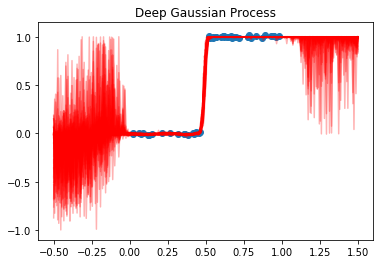

In [31]:
plt.figure()
plt.plot(Xs, y_m[:, :, 0].numpy().T, color='r', alpha=0.3)
plt.title('Deep Gaussian Process')
plt.scatter(X_train, Y_train)
plt.savefig('DGP_regression')

Average mean and variance

In [32]:
y_mean_prediction,y_var_prediction = dgp_model.predict(Xs, num_samples=50) 

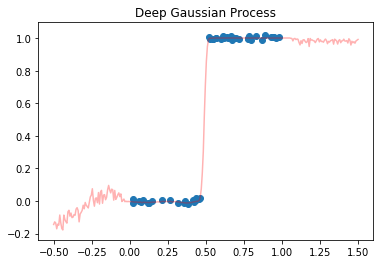

In [33]:
plt.figure()
plt.plot(Xs, y_mean_prediction, color='r', alpha=0.3)
plt.title('Deep Gaussian Process')
plt.scatter(X_train, Y_train)
plt.savefig('DGP_regression')

To propagate through the different layers

In [39]:
dgp_model.propagate?

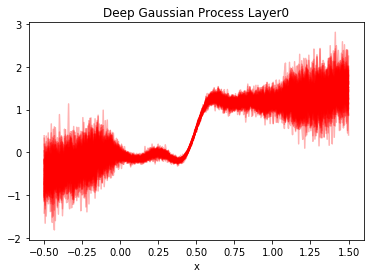

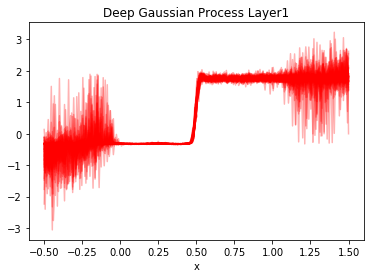

In [38]:
samples, Fmeans, Fvars = dgp_model.propagate(Xs, S=50)
for i in range(len(num_units)):
    plt.figure()
    plt.plot(Xs, samples[i].numpy()[:, :, 0].T, color='r', alpha=0.3)
    plt.title('Deep Gaussian Process Layer'+str(i))
    plt.savefig('DGP_regression_layer'+str(i))
    plt.xlabel('x')